<a href="https://colab.research.google.com/github/gecon1/dw_matrix_road_sign/blob/master/t3_day4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [20]:
import pandas as pd
import numpy as np
import os
import datetime

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout
from tensorflow.keras.utils import to_categorical

%load_ext tensorboard

import matplotlib.pyplot as plt
from skimage import color, exposure

from sklearn.metrics import accuracy_score

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


In [2]:
cd /content/drive/My Drive/Colab Notebooks/matrix/matrix_tree/dw_matrix_road_sign/

/content/drive/My Drive/Colab Notebooks/matrix/matrix_tree/dw_matrix_road_sign


In [0]:
train = pd.read_pickle('data/train.p')
test = pd.read_pickle('data/test.p')

X_train, y_train = train['features'], train['labels']
X_test, y_test = test['features'], test['labels']

In [0]:
if y_train.ndim ==1: y_train = to_categorical(y_train)
if y_test.ndim ==1: y_test = to_categorical(y_test)

In [0]:
input_shape = X_train.shape[1:]
num_classes = y_train.shape[1]

In [0]:
def get_cnn_v1(input_shape, num_classes):
  return Sequential([
    Conv2D(filters=64, kernel_size=(3, 3), activation='relu', input_shape=input_shape),
    Flatten(),
    Dense(num_classes, activation='softmax')
    ])



def train_model(model, X_train, y_train, params_fit={}):
  model.compile(loss='categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])

  logdir = os.path.join("logs", datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
  tensorboard_callback = tf.keras.callbacks.TensorBoard(logdir, histogram_freq=1)
  model.fit(
      X_train,
      y_train,
      batch_size=params_fit.get('batch_size', 128),
      epochs=params_fit.get('epochs', 5),
      verbose=params_fit.get('verbose', 1),
      validation_data=params_fit.get('validation_data', (X_test, y_test)),
      callbacks= [tensorboard_callback]
      
      )
  return model

In [8]:
model = get_cnn_v1(input_shape, num_classes)
model_trained = train_model(model, X_train, y_train)

Epoch 1/5
272/272 [==============================] - 3s 13ms/step - loss: 45.1156 - accuracy: 0.7028 - val_loss: 1.7595 - val_accuracy: 0.7651
Epoch 2/5
272/272 [==============================] - 3s 12ms/step - loss: 0.2443 - accuracy: 0.9416 - val_loss: 1.9072 - val_accuracy: 0.8016
Epoch 3/5
272/272 [==============================] - 3s 12ms/step - loss: 0.1701 - accuracy: 0.9600 - val_loss: 1.9888 - val_accuracy: 0.8188
Epoch 4/5
272/272 [==============================] - 3s 12ms/step - loss: 0.1294 - accuracy: 0.9705 - val_loss: 1.7877 - val_accuracy: 0.8249
Epoch 5/5
272/272 [==============================] - 3s 12ms/step - loss: 0.1158 - accuracy: 0.9747 - val_loss: 2.3114 - val_accuracy: 0.8159


In [9]:
y_pred_prob = model_trained.predict(X_test)
y_pred_prob

array([[8.24512403e-11, 1.57273206e-07, 7.67143304e-03, ...,
        7.28570981e-08, 8.09573407e-07, 1.01800836e-07],
       [7.01453977e-13, 6.22790042e-09, 3.60958241e-02, ...,
        1.10291360e-07, 9.00152575e-09, 9.66917035e-09],
       [1.51956459e-09, 5.79739890e-07, 2.78941132e-02, ...,
        4.28585736e-07, 3.66872268e-06, 2.16043213e-06],
       ...,
       [1.42905042e-02, 1.05611309e-02, 4.96748555e-03, ...,
        8.74885882e-05, 1.67369074e-03, 3.98991891e-04],
       [3.02484282e-03, 8.60839617e-03, 1.64647901e-03, ...,
        8.69679207e-05, 1.77412026e-03, 5.03236188e-05],
       [1.85837247e-03, 7.37680960e-03, 1.56918839e-02, ...,
        1.55356887e-04, 5.19170379e-03, 3.59798905e-05]], dtype=float32)

In [14]:
y_pred_prob[400]

array([9.77060322e-10, 9.90363657e-01, 6.25232062e-08, 4.67583250e-10,
       9.63625312e-03, 1.06191878e-09, 4.17581990e-18, 6.51879374e-23,
       9.76955208e-19, 7.22057810e-15, 8.29930251e-15, 1.14514535e-14,
       2.03130013e-11, 4.72892142e-17, 1.64617585e-20, 4.53306660e-19,
       1.36166536e-08, 1.11080340e-27, 3.52629510e-17, 7.93011203e-20,
       3.33096906e-18, 1.02042642e-22, 2.15591525e-27, 8.07620570e-24,
       2.70757039e-20, 1.74352530e-18, 8.11606818e-19, 1.30909599e-27,
       7.75547856e-15, 7.70693249e-23, 1.86637287e-27, 5.79981582e-23,
       1.20064050e-17, 1.91884189e-20, 1.27610762e-31, 5.80958994e-20,
       5.40127723e-32, 1.28904629e-27, 1.64291051e-24, 3.29848681e-32,
       1.97275445e-22, 9.81742130e-24, 4.25642304e-27], dtype=float32)

<BarContainer object of 43 artists>

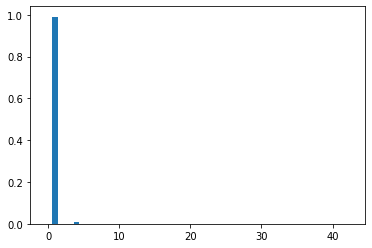

In [19]:
plt.bar(range(43), y_pred_prob[400])

In [17]:
np.argmax(y_pred_prob[400])

1

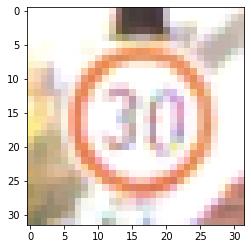

In [13]:
plt.imshow(X_test[400])

In [0]:
df = pd.read_csv('data/signnames.csv')
labels_dict = df.to_dict()['b']

In [18]:

labels_dict[ np.argmax(y_pred_prob[400])]

'Speed limit (30km/h)'

In [0]:
def predict(model_trained, X_test, y_test, scoring=accuracy_score):
  
  y_test_norm = np.argmax(y_test, axis=1)

  y_pred_prob = model_trained.predict(X_test)
  y_pred = np.argmax(y_pred_prob, axis=1)

  return scoring(y_test_norm, y_pred)



In [24]:
predict(model_trained, X_test, y_test )

0.8158730158730159

In [0]:
def train_and_predict(model):
  # model = get_cnn_v2(input_shape, num_classes)
  model_trained = train_model(model, X_train, y_train)

  return predict(model_trained, X_test, y_test )

In [27]:
def get_cnn_v2(input_shape, num_classes):
  return Sequential([
    Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=input_shape),
    MaxPool2D(),
    Dropout(0.3),

    Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    MaxPool2D(),
    Dropout(0.3),

    Flatten(),

    Dense(1024, activation='relu'),
    Dropout(0.3),

    Dense(num_classes, activation='softmax')
    ])
  




train_and_predict( get_cnn_v2(input_shape, num_classes) )

Epoch 1/5
272/272 [==============================] - 3s 11ms/step - loss: 4.5082 - accuracy: 0.4106 - val_loss: 0.9759 - val_accuracy: 0.7485
Epoch 2/5
272/272 [==============================] - 3s 10ms/step - loss: 0.7147 - accuracy: 0.7919 - val_loss: 0.4677 - val_accuracy: 0.8810
Epoch 3/5
272/272 [==============================] - 3s 10ms/step - loss: 0.4144 - accuracy: 0.8790 - val_loss: 0.3464 - val_accuracy: 0.9116
Epoch 4/5
272/272 [==============================] - 3s 10ms/step - loss: 0.2977 - accuracy: 0.9111 - val_loss: 0.3172 - val_accuracy: 0.9152
Epoch 5/5
272/272 [==============================] - 3s 10ms/step - loss: 0.2322 - accuracy: 0.9308 - val_loss: 0.3064 - val_accuracy: 0.9197


0.9197278911564626

In [28]:
def get_cnn_v2(input_shape, num_classes):
  return Sequential([
    Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=input_shape),
    MaxPool2D(),
    Dropout(0.3),

    Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    MaxPool2D(),
    Dropout(0.3),

    Flatten(),

    Dense(1024, activation='relu'),
    Dropout(0.3),

    Dense(num_classes, activation='softmax')
    ])
  




train_and_predict( get_cnn_v2(input_shape, num_classes) )

Epoch 1/5
272/272 [==============================] - 4s 15ms/step - loss: 2.3291 - accuracy: 0.4922 - val_loss: 0.5098 - val_accuracy: 0.8630
Epoch 2/5
272/272 [==============================] - 4s 14ms/step - loss: 0.5337 - accuracy: 0.8423 - val_loss: 0.2595 - val_accuracy: 0.9351
Epoch 3/5
272/272 [==============================] - 4s 14ms/step - loss: 0.2802 - accuracy: 0.9144 - val_loss: 0.1133 - val_accuracy: 0.9710
Epoch 4/5
272/272 [==============================] - 4s 14ms/step - loss: 0.1802 - accuracy: 0.9444 - val_loss: 0.0901 - val_accuracy: 0.9803
Epoch 5/5
272/272 [==============================] - 4s 14ms/step - loss: 0.1406 - accuracy: 0.9562 - val_loss: 0.0685 - val_accuracy: 0.9837


0.9836734693877551

In [31]:
def get_cnn_v4(input_shape, num_classes):
  return Sequential([
    Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=input_shape),
    Conv2D(filters=32, kernel_size=(3, 3), activation='relu', padding='same'),
    MaxPool2D(),
    Dropout(0.3),

    Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    Conv2D(filters=64, kernel_size=(3, 3), activation='relu', padding='same'),
    MaxPool2D(),
    Dropout(0.3),

    Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    Conv2D(filters=64, kernel_size=(3, 3), activation='relu', padding='same'),
    MaxPool2D(),
    Dropout(0.3),

    Flatten(),

    Dense(1024, activation='relu'),
    Dropout(0.3),

    Dense(num_classes, activation='softmax')
    ])
  



# get_cnn_v4(input_shape, num_classes).summary()
train_and_predict( get_cnn_v4(input_shape, num_classes) )

Epoch 1/5
272/272 [==============================] - 5s 17ms/step - loss: 2.4503 - accuracy: 0.3475 - val_loss: 0.8204 - val_accuracy: 0.7739
Epoch 2/5
272/272 [==============================] - 4s 15ms/step - loss: 0.5834 - accuracy: 0.8260 - val_loss: 0.1975 - val_accuracy: 0.9506
Epoch 3/5
272/272 [==============================] - 4s 15ms/step - loss: 0.2642 - accuracy: 0.9209 - val_loss: 0.1183 - val_accuracy: 0.9712
Epoch 4/5
272/272 [==============================] - 4s 15ms/step - loss: 0.1812 - accuracy: 0.9470 - val_loss: 0.1098 - val_accuracy: 0.9680
Epoch 5/5
272/272 [==============================] - 4s 15ms/step - loss: 0.1307 - accuracy: 0.9636 - val_loss: 0.0758 - val_accuracy: 0.9794


0.9793650793650793

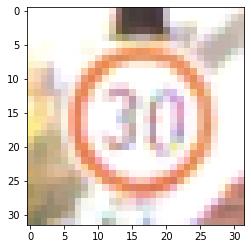

In [45]:
plt.imshow(X_test[400])

In [42]:
def get_cnn_v5(input_shape, num_classes):
  return Sequential([
    Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=input_shape),
    Conv2D(filters=32, kernel_size=(3, 3), activation='relu', padding='same'),
    MaxPool2D(),
    Dropout(0.3),

    Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    Conv2D(filters=64, kernel_size=(3, 3), activation='relu', padding='same'),
    MaxPool2D(),
    Dropout(0.3),

    Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    Conv2D(filters=64, kernel_size=(3, 3), activation='relu', padding='same'),
    MaxPool2D(),
    Dropout(0.3),

    Flatten(),

    Dense(1024, activation='relu'),
    Dropout(0.3),

    Dense(1024, activation='relu'),
    Dropout(0.3),

    Dense(num_classes, activation='softmax')
    ])
  



# get_cnn_v4(input_shape, num_classes).summary()
train_and_predict( get_cnn_v5(input_shape, num_classes) )

Epoch 1/5
272/272 [==============================] - 5s 17ms/step - loss: 2.5677 - accuracy: 0.2984 - val_loss: 1.0391 - val_accuracy: 0.6664
Epoch 2/5
272/272 [==============================] - 4s 16ms/step - loss: 0.7472 - accuracy: 0.7616 - val_loss: 0.2896 - val_accuracy: 0.9213
Epoch 3/5
272/272 [==============================] - 4s 16ms/step - loss: 0.3410 - accuracy: 0.8953 - val_loss: 0.1972 - val_accuracy: 0.9494
Epoch 4/5
272/272 [==============================] - 4s 16ms/step - loss: 0.2287 - accuracy: 0.9322 - val_loss: 0.1886 - val_accuracy: 0.9583
Epoch 5/5
272/272 [==============================] - 4s 16ms/step - loss: 0.1686 - accuracy: 0.9494 - val_loss: 0.1366 - val_accuracy: 0.9615


0.9614512471655329

In [0]:
X_train_gray =  color.rgb2gray(X_train).reshape(-1, 32, 32, 1)
X_test_gray =  color.rgb2gray(X_test).reshape(-1, 32, 32, 1)

In [37]:
# X_train_gray.reshape(-1, 32, 32, 1).shape

(34799, 32, 32, 1)

In [44]:
model =  get_cnn_v5((32, 32, 1), num_classes)
model_trained = train_model(model, X_train_gray, y_train, params_fit={})
predict(model_trained, X_test_gray, y_test)




Epoch 1/5
269/272 [============================>.] - ETA: 0s - loss: 2.1235 - accuracy: 0.3938

ValueError: ignored